# Predicting Bike Rentals

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

Hadi Fanaee-T at the University of Porto compiled this data into a CSV file, which we will be working with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the University of California, Irvine's website. 

In this project, we will try to predict the total number of bikes people rented in a given hour. We will predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, we will create a few different machine learning models and evaluate their performance.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


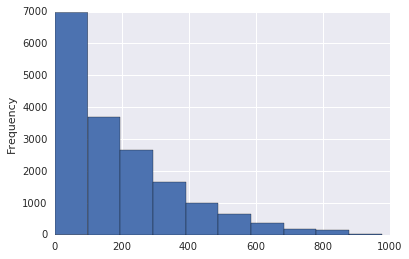

In [3]:
#First, let's check the cnt distribution
bike_rentals['cnt'].plot.hist()

In [4]:
#Exploring how each column is correlated with cnt.
bike_rentals.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

The hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

In [5]:
def assign_label(n):
    if (n >=6) & (n < 12):
        return 1
    elif (n >=12) & (n < 18):
        return 2
    elif (n >=18) & (n < 24):
        return 3
    else:
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


Due to this is a regression problem we will use Root mean squared error as the error metric

In [6]:
train = bike_rentals.sample(frac = 0.8)
test = bike_rentals[~bike_rentals.index.isin(train.index)]

## 1. Linear Regressión

In [7]:
columns = ['hum', 'weathersit', 'holiday', 'weekday', 'workingday', 'windspeed', 'mnth', 'season', 'yr', 'instant', 'hr', 'atemp', 'temp']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])
predicted_lr = lr.predict(test[columns])
mean_squared_error(test['cnt'], predicted_lr)**(1/2)

141.02986282350597

In [8]:
columns_2 = ['hum', 'weathersit', 'windspeed', 'mnth', 'season', 'yr', 'instant', 'hr', 'atemp', 'temp']
lr_2 = LinearRegression()
lr_2.fit(train[columns_2], train['cnt'])
predicted_lr_2 = lr_2.predict(test[columns_2])
mean_squared_error(test['cnt'], predicted_lr_2)**(1/2)

141.14685233874053

I think that the error is too much, let's try another model

## 2. Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(train[columns], train['cnt'])
predicted_regressor = regressor.predict(test[columns])
mean_squared_error(test['cnt'], predicted_regressor)**(1/2)

56.11022718664316

In [15]:
#let's check de error in the training set
predicted_train_regressor = regressor.predict(train[columns])
mean_squared_error(train['cnt'], predicted_train_regressor)**(1/2)

0.0

The error is much more less, but the model is overfited. Let's try to custom the decision tree regressor

In [25]:
regressor_2 = DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=13)
regressor_2.fit(train[columns], train['cnt'])
predicted_regressor_2 = regressor_2.predict(test[columns])
mean_squared_error(test['cnt'], predicted_regressor_2)**(1/2)

51.63623982329971

In [21]:
#let's check de error in the training set
predicted_train_regressor = regressor_2.predict(train[columns])
mean_squared_error(train['cnt'], predicted_train_regressor)**(1/2)

40.718782118013124

## 3. Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train[columns], train['cnt'])
predicted_rfr = rfr.predict(test[columns])
mean_squared_error(test['cnt'], predicted_rfr)**(1/2)

44.179175114628116

In [26]:
rfr_2 = RandomForestRegressor(min_samples_leaf=10, min_samples_split=13)
rfr_2.fit(train[columns], train['cnt'])
predicted_rfr_2 = rfr_2.predict(test[columns])
mean_squared_error(test['cnt'], predicted_rfr_2)**(1/2)

47.138457274173795

After trying different algorithms we can concluce that random forest give us the best results